In [1]:
import numpy as np 
import pandas as pd 
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from matplotlib.pyplot import figure
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
df = pd.read_csv("EComerce.csv")
print(df)

                       Rubro  \
0                  Household   
1                  Household   
2                  Household   
3                  Household   
4                  Household   
...                      ...   
999   Clothing & Accessories   
1000  Clothing & Accessories   
1001  Clothing & Accessories   
1002  Clothing & Accessories   
1003  Clothing & Accessories   

                                                  Texto  
0     Sky Trends Plastic Basket with Artificial Flow...  
1     Aashi Enterprise Cane Basket roti Serving Gift...  
2     Pragati Pro flower basket diary Pragati Pro fl...  
3     Imported White Satin Bowknot Wedding Flower Gi...  
4     Trust Basket Carnation Mixed Flowers Seeds (Gr...  
...                                                 ...  
999   Noise NOIHWP162 13-in-1 Pixels Multifuntional ...  
1000  GOLDEN GIRL Men's Swimming Shorts, Silicone Sw...  
1001  GOLDEN GIRL Swimming Kit for Boys Kids & Men P...  
1002  MoohMaya™ Premium NY Solid Ca

In [3]:
textos= df.iloc[:,]["Texto"]
textos

0       Sky Trends Plastic Basket with Artificial Flow...
1       Aashi Enterprise Cane Basket roti Serving Gift...
2       Pragati Pro flower basket diary Pragati Pro fl...
3       Imported White Satin Bowknot Wedding Flower Gi...
4       Trust Basket Carnation Mixed Flowers Seeds (Gr...
                              ...                        
999     Noise NOIHWP162 13-in-1 Pixels Multifuntional ...
1000    GOLDEN GIRL Men's Swimming Shorts, Silicone Sw...
1001    GOLDEN GIRL Swimming Kit for Boys Kids & Men P...
1002    MoohMaya™ Premium NY Solid Caps for Men & Wome...
1003    ispeed Premium Swimming Kit with Antifog Goggl...
Name: Texto, Length: 1004, dtype: object

In [4]:
rubros = np.array(df.Rubro.value_counts())
rubros

array([379, 230, 204, 191])

In [5]:
rubros

array([379, 230, 204, 191])

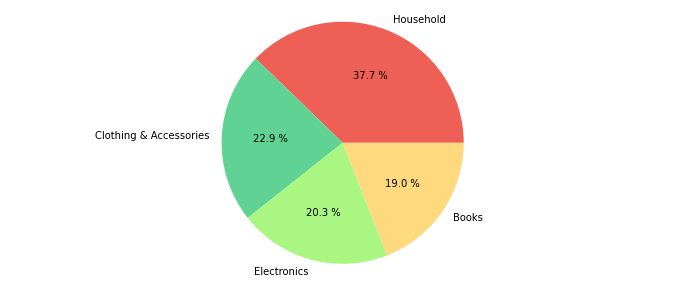

In [6]:
Types= ["Household","Clothing & Accessories", "Electronics", "Books" ]
fig= plt.figure(figsize= (12,5))
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(rubros, labels= Types, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

In [7]:
#Texto inicial
textos[0]

'Sky Trends Plastic Basket with Artificial Flower and Plant (Violet and Multicolour, 22x10x12cm) A fantastic gift to say you care, for a Birthday present or Anniversary gift, a special gift that will create a talking point.This eye catching decorative miniature rickshaw fabricated Vase with high quality materials. It is replica of the original rickshaw.These beautiful vase from the house of Sky Trends that will instantly enhance the visual appeal of your room.This is crafted by skilled craftsmen and it is designed for providing elegant and traditional look for home decor.'

In [8]:
#Normalizamos el texto
ejemplo= textos[0].lower()
ejemplo

'sky trends plastic basket with artificial flower and plant (violet and multicolour, 22x10x12cm) a fantastic gift to say you care, for a birthday present or anniversary gift, a special gift that will create a talking point.this eye catching decorative miniature rickshaw fabricated vase with high quality materials. it is replica of the original rickshaw.these beautiful vase from the house of sky trends that will instantly enhance the visual appeal of your room.this is crafted by skilled craftsmen and it is designed for providing elegant and traditional look for home decor.'

In [9]:
#Eliminamos signos de puntuación
ejemplo = re.sub(r'[^\w\s]', '', ejemplo) #borra signos de puntuacion
ejemplo

'sky trends plastic basket with artificial flower and plant violet and multicolour 22x10x12cm a fantastic gift to say you care for a birthday present or anniversary gift a special gift that will create a talking pointthis eye catching decorative miniature rickshaw fabricated vase with high quality materials it is replica of the original rickshawthese beautiful vase from the house of sky trends that will instantly enhance the visual appeal of your roomthis is crafted by skilled craftsmen and it is designed for providing elegant and traditional look for home decor'

In [10]:
#Eliminamos digitos
ejemplo = ''.join((x for x in ejemplo if not x.isdigit()))
ejemplo

'sky trends plastic basket with artificial flower and plant violet and multicolour xxcm a fantastic gift to say you care for a birthday present or anniversary gift a special gift that will create a talking pointthis eye catching decorative miniature rickshaw fabricated vase with high quality materials it is replica of the original rickshawthese beautiful vase from the house of sky trends that will instantly enhance the visual appeal of your roomthis is crafted by skilled craftsmen and it is designed for providing elegant and traditional look for home decor'

In [11]:
#Eliminamos espacios grandes
rex = re.compile(r'\s+')
ejemplo= rex.sub(' ', ejemplo)
ejemplo

'sky trends plastic basket with artificial flower and plant violet and multicolour xxcm a fantastic gift to say you care for a birthday present or anniversary gift a special gift that will create a talking pointthis eye catching decorative miniature rickshaw fabricated vase with high quality materials it is replica of the original rickshawthese beautiful vase from the house of sky trends that will instantly enhance the visual appeal of your roomthis is crafted by skilled craftsmen and it is designed for providing elegant and traditional look for home decor'

In [12]:
word_tokens = word_tokenize(ejemplo)
word_tokens

['sky',
 'trends',
 'plastic',
 'basket',
 'with',
 'artificial',
 'flower',
 'and',
 'plant',
 'violet',
 'and',
 'multicolour',
 'xxcm',
 'a',
 'fantastic',
 'gift',
 'to',
 'say',
 'you',
 'care',
 'for',
 'a',
 'birthday',
 'present',
 'or',
 'anniversary',
 'gift',
 'a',
 'special',
 'gift',
 'that',
 'will',
 'create',
 'a',
 'talking',
 'pointthis',
 'eye',
 'catching',
 'decorative',
 'miniature',
 'rickshaw',
 'fabricated',
 'vase',
 'with',
 'high',
 'quality',
 'materials',
 'it',
 'is',
 'replica',
 'of',
 'the',
 'original',
 'rickshawthese',
 'beautiful',
 'vase',
 'from',
 'the',
 'house',
 'of',
 'sky',
 'trends',
 'that',
 'will',
 'instantly',
 'enhance',
 'the',
 'visual',
 'appeal',
 'of',
 'your',
 'roomthis',
 'is',
 'crafted',
 'by',
 'skilled',
 'craftsmen',
 'and',
 'it',
 'is',
 'designed',
 'for',
 'providing',
 'elegant',
 'and',
 'traditional',
 'look',
 'for',
 'home',
 'decor']

In [13]:
#Eliminamos las Stop Words
ejemplo_words  = ejemplo.split() 
ejemplo_words  = [word for word in word_tokens  if not word in stopwords.words('english')]
ejemplo_words 

['sky',
 'trends',
 'plastic',
 'basket',
 'artificial',
 'flower',
 'plant',
 'violet',
 'multicolour',
 'xxcm',
 'fantastic',
 'gift',
 'say',
 'care',
 'birthday',
 'present',
 'anniversary',
 'gift',
 'special',
 'gift',
 'create',
 'talking',
 'pointthis',
 'eye',
 'catching',
 'decorative',
 'miniature',
 'rickshaw',
 'fabricated',
 'vase',
 'high',
 'quality',
 'materials',
 'replica',
 'original',
 'rickshawthese',
 'beautiful',
 'vase',
 'house',
 'sky',
 'trends',
 'instantly',
 'enhance',
 'visual',
 'appeal',
 'roomthis',
 'crafted',
 'skilled',
 'craftsmen',
 'designed',
 'providing',
 'elegant',
 'traditional',
 'look',
 'home',
 'decor']

In [15]:
#Reaizamos el steaming 
ps = PorterStemmer()
ejemplo_words=[ps.stem(word) for word in ejemplo_words]
ejemplo_words

['sky',
 'trend',
 'plastic',
 'basket',
 'artifici',
 'flower',
 'plant',
 'violet',
 'multicolour',
 'xxcm',
 'fantast',
 'gift',
 'say',
 'care',
 'birthday',
 'present',
 'anniversari',
 'gift',
 'special',
 'gift',
 'creat',
 'talk',
 'pointthi',
 'eye',
 'catch',
 'decor',
 'miniatur',
 'rickshaw',
 'fabric',
 'vase',
 'high',
 'qualiti',
 'materi',
 'replica',
 'origin',
 'rickshawthes',
 'beauti',
 'vase',
 'hous',
 'sky',
 'trend',
 'instantli',
 'enhanc',
 'visual',
 'appeal',
 'roomthi',
 'craft',
 'skill',
 'craftsmen',
 'design',
 'provid',
 'eleg',
 'tradit',
 'look',
 'home',
 'decor']

In [16]:
ejemplo =' '.join(ejemplo_words)
ejemplo

'sky trend plastic basket artifici flower plant violet multicolour xxcm fantast gift say care birthday present anniversari gift special gift creat talk pointthi eye catch decor miniatur rickshaw fabric vase high qualiti materi replica origin rickshawthes beauti vase hous sky trend instantli enhanc visual appeal roomthi craft skill craftsmen design provid eleg tradit look home decor'

In [17]:
#Realizamos el preprocesamiento para todos los textos
ps = PorterStemmer()
rex = re.compile(r'\s+')
for i in range(len(textos)):
  aux = textos[i].lower()
  aux = ''.join((x for x in aux if not x.isdigit()))
  aux = re.sub(r'[^\w\s]', '', aux)
  aux = re.sub(r"http\S+", "", aux)
  aux = rex.sub(' ', aux)
  word_tokens = word_tokenize(aux)
  aux = [word for word in word_tokens  if not word in stopwords.words('english')]
  aux = [ps.stem(word) for word in aux]
  df['Texto'][i]= aux

df

,Rubro,Texto
0,Household,"[sky, trend, plastic, basket, artifici, flower..."
1,Household,"[aashi, enterpris, cane, basket, roti, serv, g..."
2,Household,"[pragati, pro, flower, basket, diari, pragati,..."
3,Household,"[import, white, satin, bowknot, wed, flower, g..."
4,Household,"[trust, basket, carnat, mix, flower, seed, gre..."
...,...,...
999,Clothing & Accessories,"[nois, noihwp, pixel, multifunt, polyest, band..."
1000,Clothing & Accessories,"[golden, girl, men, swim, short, silicon, swim..."
1001,Clothing & Accessories,"[golden, girl, swim, kit, boy, kid, men, packa..."
1002,Clothing & Accessories,"[moohmaya, premium, ny, solid, cap, men, women..."


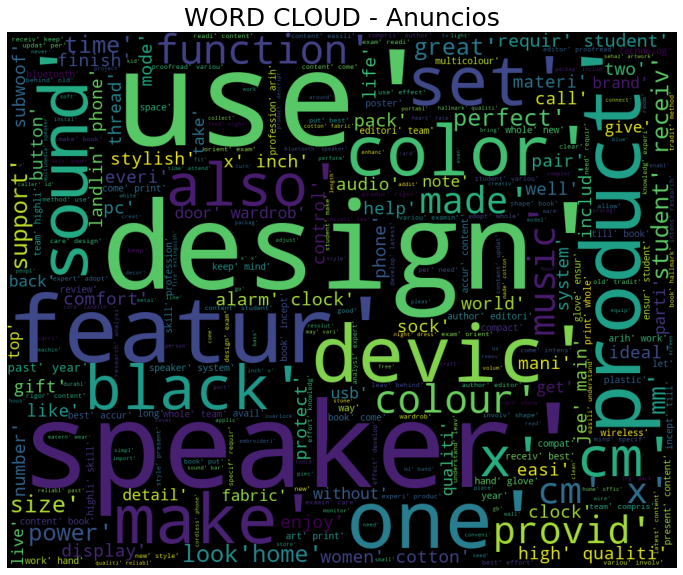

In [18]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['Texto'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Anuncios",fontsize=25)
plt.axis('off')
plt.show()

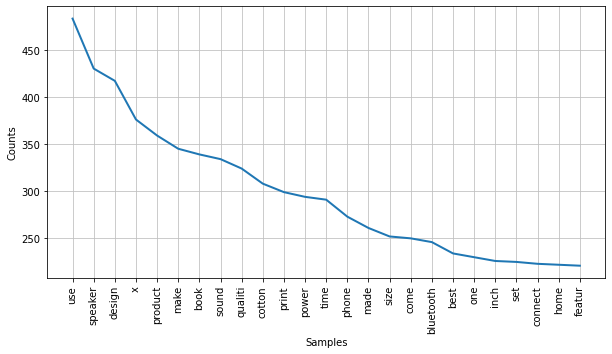

In [19]:
aux2 = np.array(df["Texto"])
wordsText= []
for i in range(len(aux2)):
  a= aux2[i]
  for w in range(len(a)):
    wordsText.append(a[w])

# Creating the word frequency distribution
freqdist = nltk.FreqDist(wordsText)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)


In [20]:
#Creamos lista con los indices de los registros correspondientes a cada una de las clases 
house= df['Rubro'] == "Household"
CyA= df['Rubro'] == "Clothing & Accessories"
Book= df['Rubro']== "Books"
Electronics = df['Rubro']== "Electronics"

In [21]:
#Creamos los subconjuntos de las clases para obtener sus graficas
df_house= df[house]
df_CyA= df[CyA]
df_book= df[Book]
df_electronics= df[Electronics]

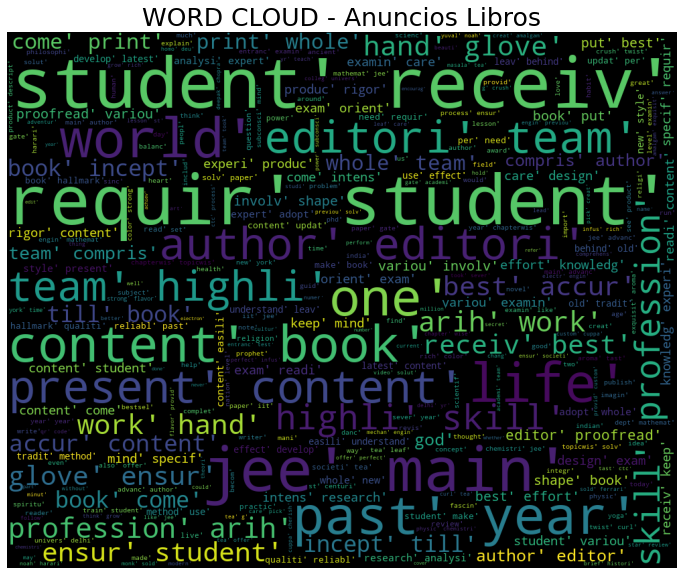

In [22]:
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_book['Texto'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Anuncios Libros",fontsize=25)
plt.axis('off')
plt.show()

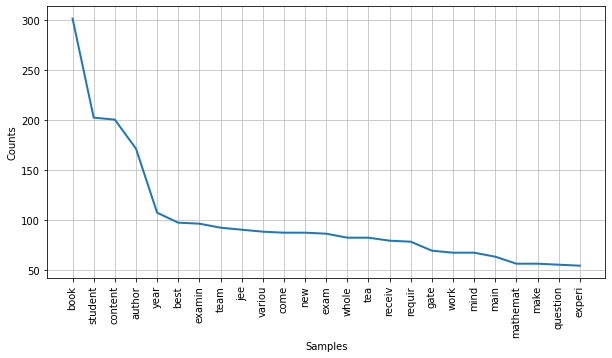

In [23]:
aux2 = np.array(df_book["Texto"])
wordsBook= []
for i in range(len(aux2)):
  a= aux2[i]
  for w in range(len(a)):
    wordsBook.append(a[w])

# Creating the word frequency distribution
freqdist = nltk.FreqDist(wordsBook)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)


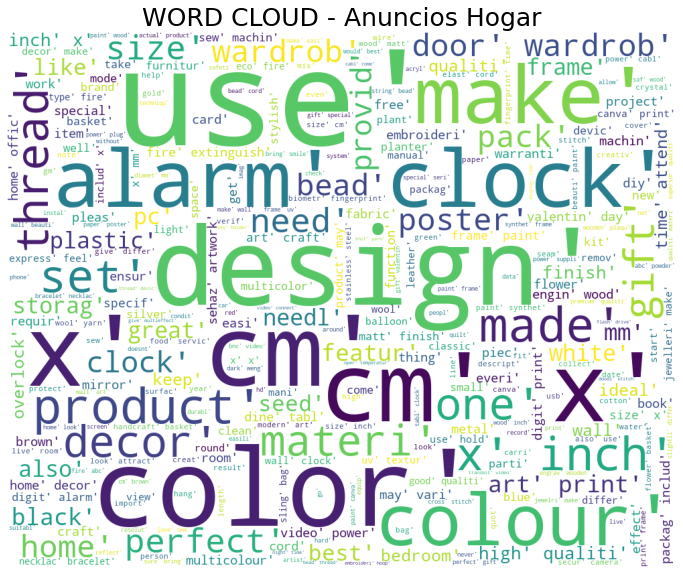

In [24]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_house['Texto'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Anuncios Hogar",fontsize=25)
plt.axis('off')
plt.show()

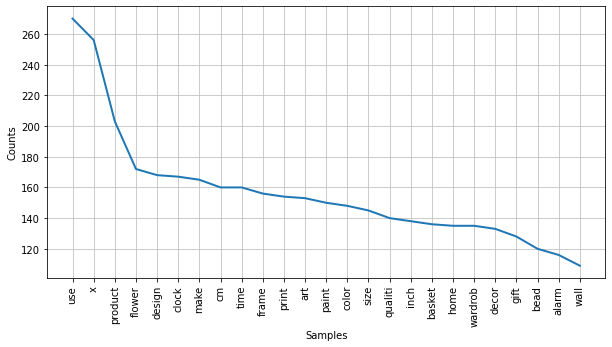

In [ ]:
aux2 = np.array(df_house["Texto"])
wordsHouse= []
for i in range(len(aux2)):
  a= aux2[i]
  for w in range(len(a)):
    wordsHouse.append(a[w])

# Creating the word frequency distribution
freqdist = nltk.FreqDist(wordsHouse)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)


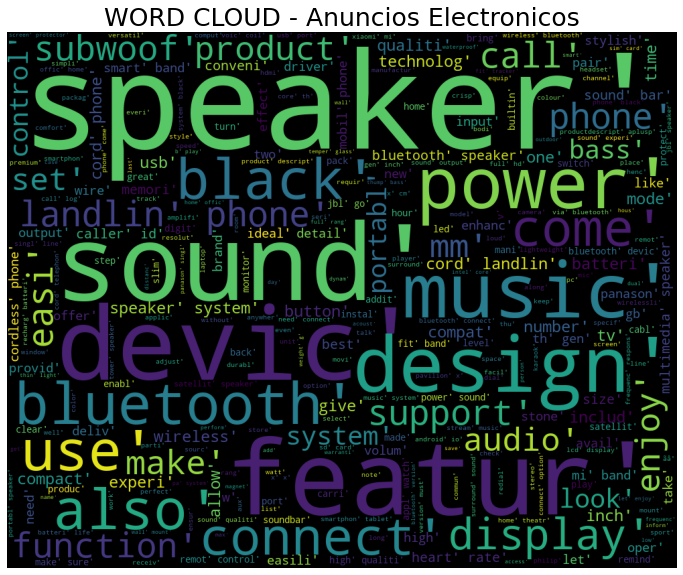

In [ ]:
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_electronics['Texto'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Anuncios Electronicos",fontsize=25)
plt.axis('off')
plt.show()

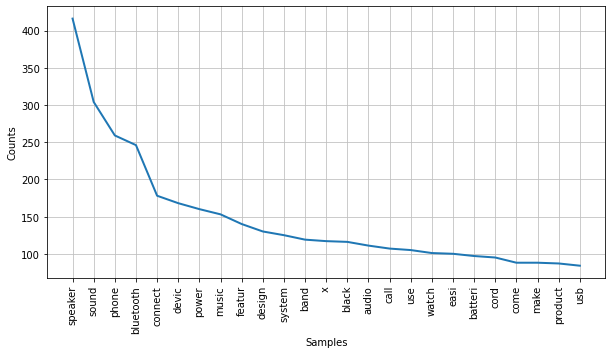

In [ ]:
aux2 = np.array(df_electronics["Texto"])
wordsElec= []
for i in range(len(aux2)):
  a= aux2[i]
  for w in range(len(a)):
    wordsElec.append(a[w])

# Creating the word frequency distribution
freqdist = nltk.FreqDist(wordsElec)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)


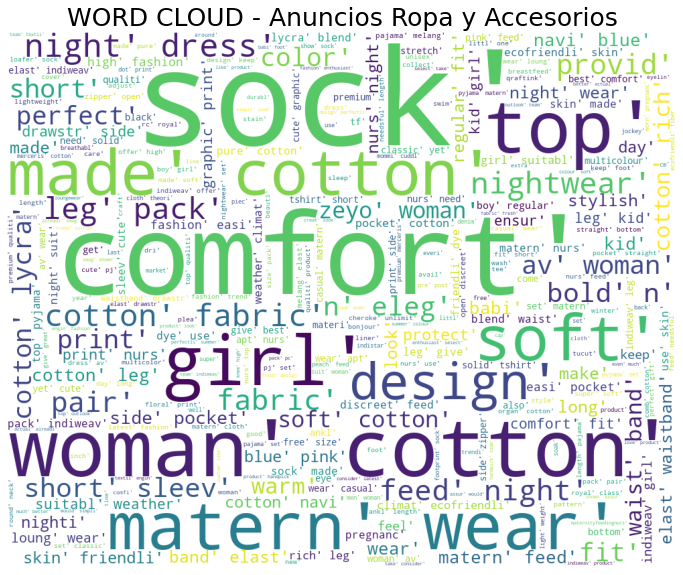

In [ ]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_CyA['Texto'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - Anuncios Ropa y Accesorios",fontsize=25)
plt.axis('off')
plt.show()

In [ ]:
aux2 = np.array(df_CyA["Texto"])
wordsCyA= []
for i in range(len(aux2)):
  a= aux2[i]
  for w in range(len(a)):
    wordsCyA.append(a[w])

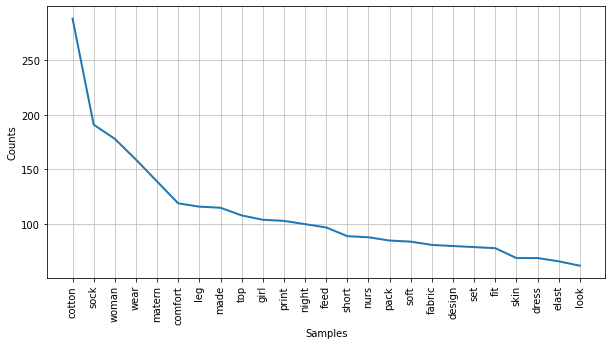

In [ ]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(wordsCyA)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)